# Example and how to use the `keras-toolbox`

Source code is here : https://github.com/hadim/keras-toolbox

To install do `pip install keras-toolbox`.

## The Monitor callback

The monitor callbacks allow you to monitor a Keras model during the training phase.

Currently `keras-toolbox` has three Monitor callbacks :

- `PrintMonitor` : print the state on the output.
- `TelegramMonitor` : send the state in real-time to a chat ID on Telegram with a bot.
- `FileMonitor` : dump the entire state at each update in a JSON file.

Note that the `PrintMonitor` callback is mainly used for testing purpose. The `Monitor` you probably want to use are `TelegramMonitor` and `FileMonitor` or maybe you can make a new one.

To use see following example :

In [1]:
%matplotlib inline

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

# Load dataset
img_rows, img_cols = 28, 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reduce the size of the dataset (for testing prupose)
X_train, y_train = X_train[:200], y_train[:200]
X_test, y_test = X_test[:200], y_test[:200]

# Preprocess dataset
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# Build model
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='valid', activation='relu', input_shape=(1, img_rows, img_cols)))
model.add(Convolution2D(32, 3, 3, activation='relu',))
model.add(Convolution2D(32, 3, 3, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

Using Theano backend.


In [2]:
# Create the monitor adn add it to the callback list

from kerastoolbox.callbacks import PrintMonitor , FileMonitor, TelegramMonitor

monitor = PrintMonitor()

# Other monitor can be used also
# monitor = FileMonitor("/path/to/the/file/to/use")
# monitor = TelegramMonitor(api_token="<your API token>", chat_id="your chat ID")

callbacks = [monitor, ]

In [3]:
history = model.fit(X_train, Y_train,
                    batch_size=32,
                    nb_epoch=5,
                    verbose=0,
                    callbacks=callbacks,
                    validation_data=(X_test, Y_test))

Monitor initialized.
Name of the model is "A Keras model"
Model ID is 2a2752d9-09a5-4b32-9980-969d741011dc
Training ID is a688d353-daa5-4df9-bcc3-356dd734f58c
Training started at 2016-08-30 13:05 for 5 epochs with 200 samples with a 11 layers model.
Epoch 1/5 is done at 2016-08-30 13:05. Average minutes/epoch is 0.07.
Logs are : acc = 0.170000 | val_acc = 0.390000 | loss = 2.270551 | val_loss = 2.212163
Epoch 2/5 is done at 2016-08-30 13:05. Average minutes/epoch is 0.05.
Logs are : acc = 0.340000 | val_acc = 0.455000 | loss = 2.062112 | val_loss = 1.876637
Epoch 3/5 is done at 2016-08-30 13:05. Average minutes/epoch is 0.04.
Logs are : acc = 0.475000 | val_acc = 0.525000 | loss = 1.540835 | val_loss = 1.440794
Epoch 4/5 is done at 2016-08-30 13:05. Average minutes/epoch is 0.04.
Logs are : acc = 0.645000 | val_acc = 0.655000 | loss = 1.063337 | val_loss = 1.170254
Epoch 5/5 is done at 2016-08-30 13:05. Average minutes/epoch is 0.03.
Logs are : acc = 0.730000 | val_acc = 0.640000 | los

## The visualization functions

All the functions use matplotlib for now but I am not against another library more "interactive" friendly to use in the Jupyter notebook (Bokeh for example).

Let's use the same `Model` object from above.

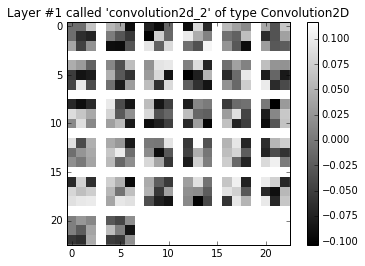

In [4]:
# Plot the weights of one specific layer in your model

from kerastoolbox.visu import plot_weights
plot_weights(model, layer_id=1, n=256, ax=None)

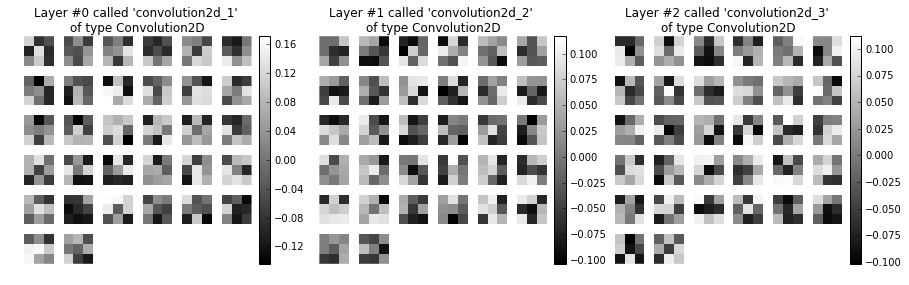

In [5]:
# Now plot all the weights of all the 2D layers

from kerastoolbox.visu import plot_all_weights
_ = plot_all_weights(model, n=256, n_columns=3)

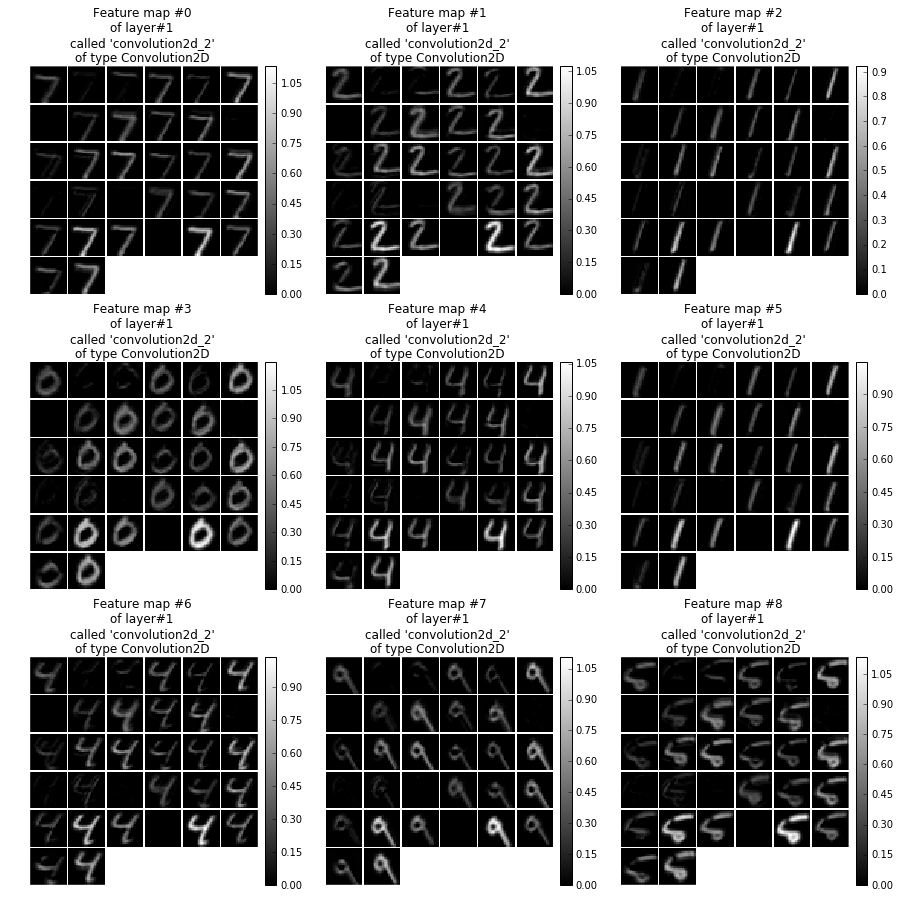

In [6]:
# Now let's plot the feature maps of a specific layer for a bunch of images

from kerastoolbox.visu import plot_feature_map

images = X_test[:9]
_ = plot_feature_map(model, X=images, layer_id=1, n_columns=3, n=256)

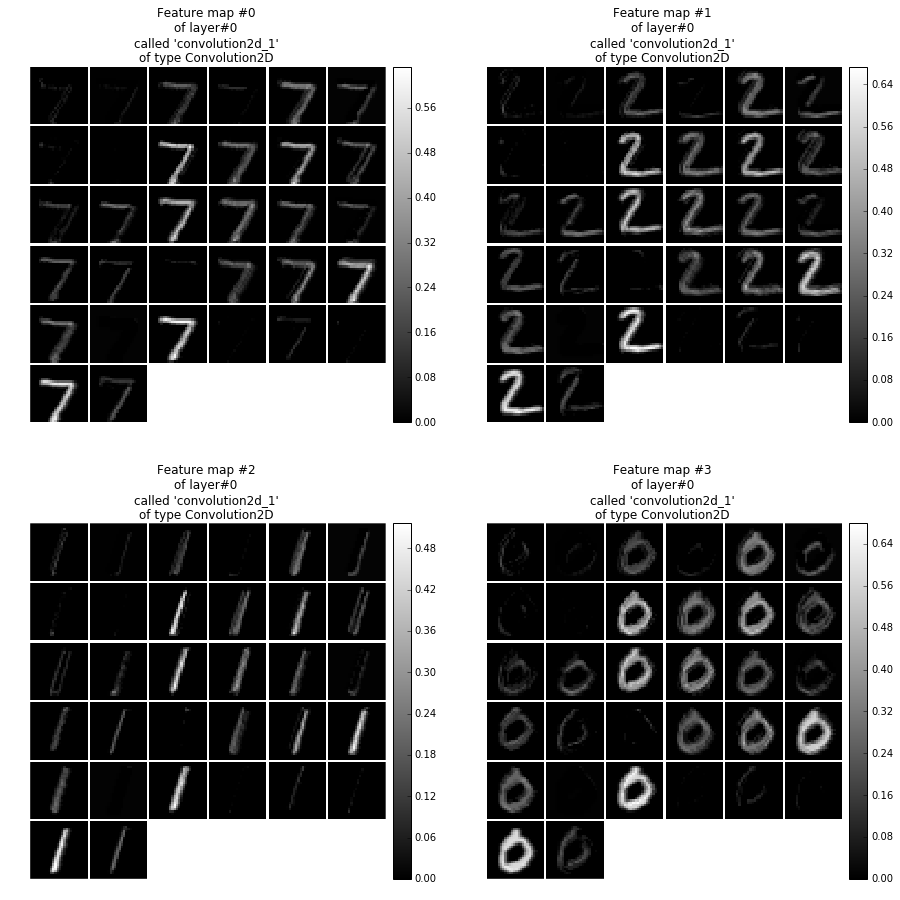

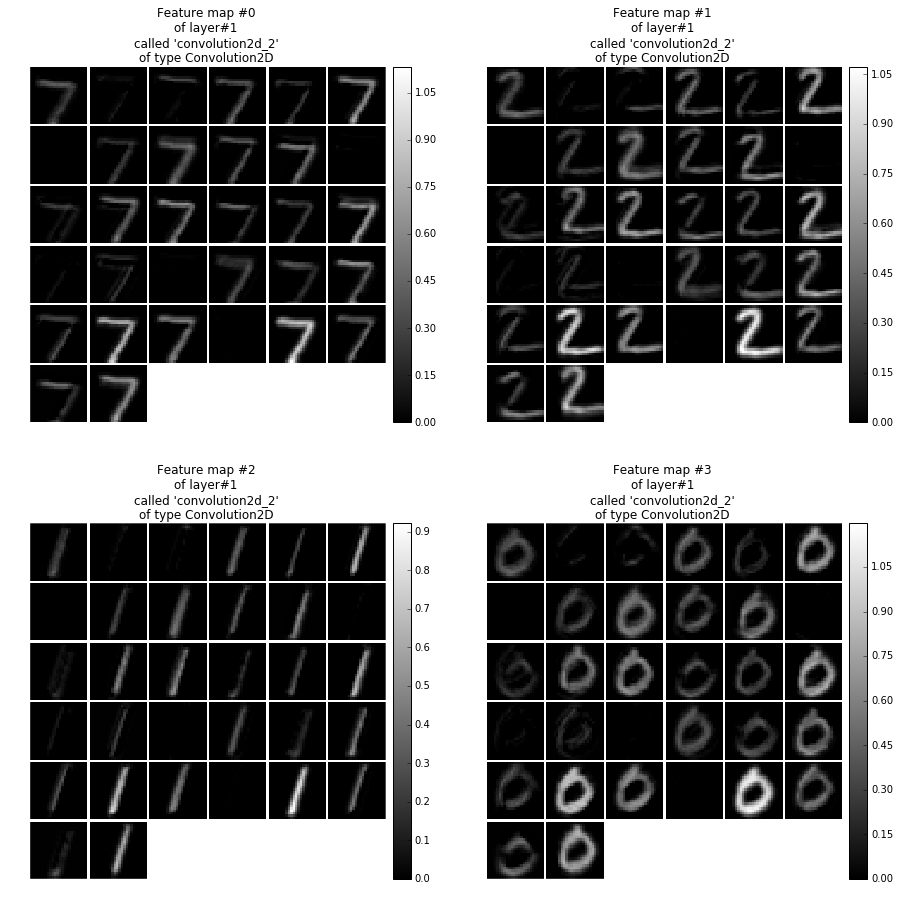

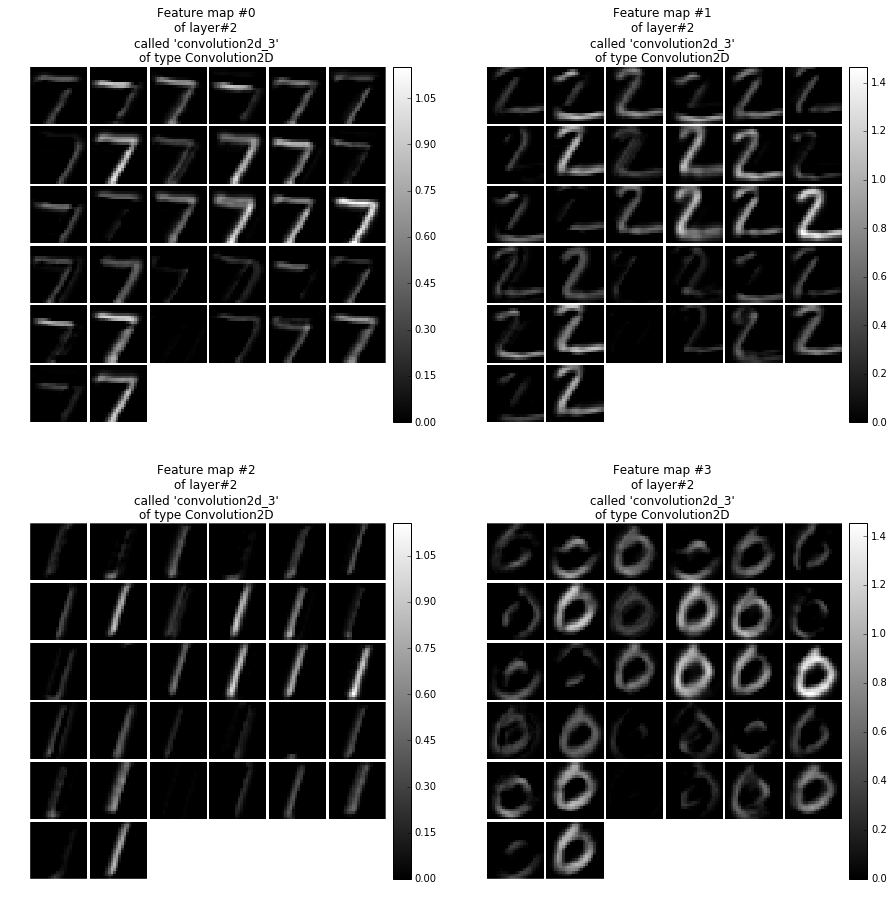

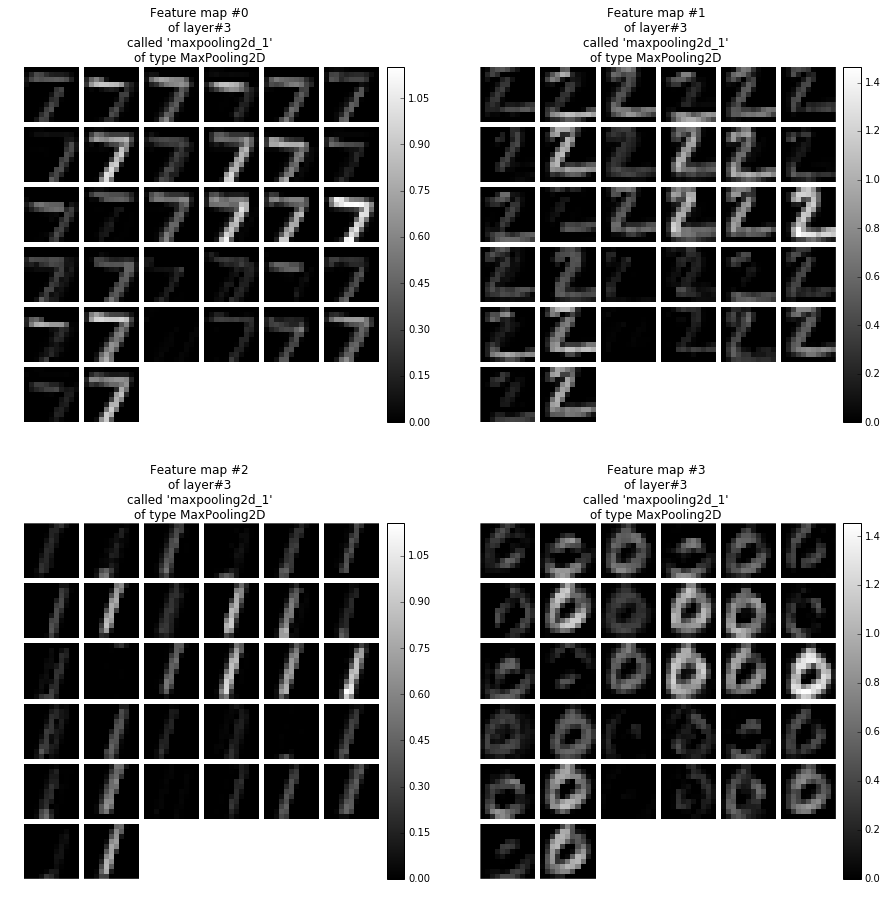

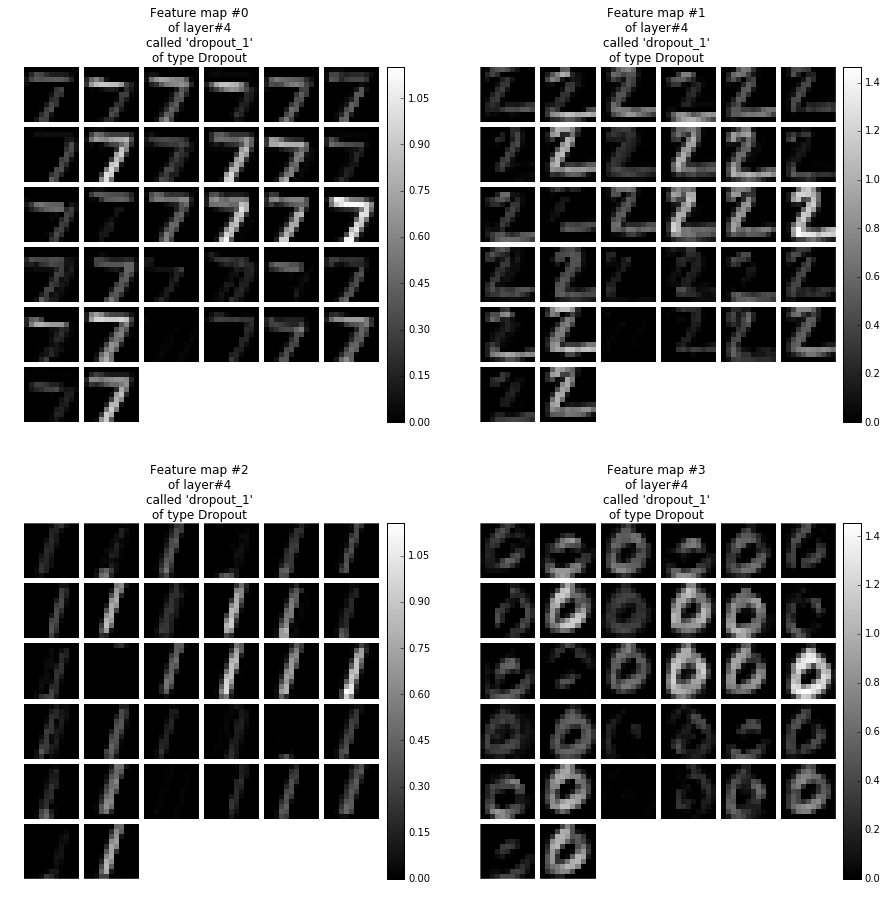

In [7]:
# Plot all feature maps for all layers for a bunch of images

from kerastoolbox.visu import plot_all_feature_maps

images = X_test[:4]
_ = plot_all_feature_maps(model, X=images, n_columns=2, n=256)

## The augmentation functions

The code is super ugly for now so no example here. See the source code https://github.com/hadim/keras-toolbox/blob/master/kerastoolbox/augmentation.py